Import Libraries


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

Load Data

In [47]:
def load_data(url):
    original_df = pd.read_excel(url)
    df = original_df.copy()
    return df

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = load_data(url)

Get First Impression of Dataset

In [48]:
def get_first_impression(df, n=3):
    return df.head(n)

print(get_first_impression(df))

          Date    Year        Type    Country       State            Location  \
0  15 Mar 2024  2024.0  Unprovoked  AUSTRALIA  Queensland       Bargara Beach   
1  04 Mar 2024  2024.0  Unprovoked        USA      Hawaii  Old Man's, Waikiki   
2  02 Mar-2024  2024.0  Unprovoked        USA      Hawaii      Rainbows, Oahu   

   Activity            Name Sex  Age  ...        Species   \
0  Swimming  Brooklyn Sauer   F   13  ...     Tiger shark   
1   Surfing   Matthew White   M  NaN  ...  Tiger shark 8'   
2  Swimming             NaN   F   11  ...  3' to 4' shark   

                      Source  pdf href formula href Case Number Case Number.1  \
0      Yahoo News, 3/15/2024  NaN          NaN  NaN         NaN           NaN   
1          Surfer, 3/6/2024F  NaN          NaN  NaN         NaN           NaN   
2  Hawaii News Now, 3/4/2024  NaN          NaN  NaN         NaN           NaN   

  original order Unnamed: 21 Unnamed: 22  
0            NaN         NaN         NaN  
1            NaN   

Cell 4: Dataset Shape

In [49]:
def get_shape(df):
    return df.shape

print(get_shape(df))

(6969, 23)


Cell 5: Clean Column Names

In [50]:
def clean_column_names(df):
    df = df.rename(columns={"Species ": "Species"})
    return df

df = clean_column_names(df)
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


# cealning Data

####Select Relevant Columns

In [51]:
def select_columns(df, columns):
    df = df[columns]
    return df

columns = ["Date", "Year", "Country", "Location", "Injury", "Species", "Activity"]
df = select_columns(df, columns)

Cell 7: Drop Rows with All NaN Values


In [52]:
def drop_all_nan_rows(df):
    df = df.dropna(how='all')
    return df

df = drop_all_nan_rows(df)
print(get_shape(df))

(6944, 7)


Cell 8: Drop Rows with NaN Year


In [53]:
def drop_nan_year(df):
    df = df.dropna(subset=['Year'])
    return df

df = drop_nan_year(df)
print(get_first_impression(df))

          Date    Year    Country            Location  \
0  15 Mar 2024  2024.0  AUSTRALIA       Bargara Beach   
1  04 Mar 2024  2024.0        USA  Old Man's, Waikiki   
2  02 Mar-2024  2024.0        USA      Rainbows, Oahu   

                                     Injury         Species  Activity  
0  Minor injuries to back, abdomen and legs     Tiger shark  Swimming  
1            No injury, shark bit surfboard  Tiger shark 8'   Surfing  
2                  Lacerations to left foot  3' to 4' shark  Swimming  


Cell 9: Correct Year Format


In [54]:
def correct_year_format(df):
    df['Year'] = df['Year'].astype(int)
    return df

df = correct_year_format(df)
print(get_first_impression(df))

          Date  Year    Country            Location  \
0  15 Mar 2024  2024  AUSTRALIA       Bargara Beach   
1  04 Mar 2024  2024        USA  Old Man's, Waikiki   
2  02 Mar-2024  2024        USA      Rainbows, Oahu   

                                     Injury         Species  Activity  
0  Minor injuries to back, abdomen and legs     Tiger shark  Swimming  
1            No injury, shark bit surfboard  Tiger shark 8'   Surfing  
2                  Lacerations to left foot  3' to 4' shark  Swimming  


Cell 10: Filter Data for Last 10 Years


In [55]:
def filter_last_10_years(df):
    df = df[df['Year'] >= 2015]
    return df

df = filter_last_10_years(df)

Cell 12: Incident Counts by Country


In [56]:
def incident_counts_by_country(df, top_n=5):
    return df['Country'].value_counts().head(top_n)

print(incident_counts_by_country(df))

Country
USA             508
AUSTRALIA       248
BAHAMAS          43
SOUTH AFRICA     43
BRAZIL           21
Name: count, dtype: int64


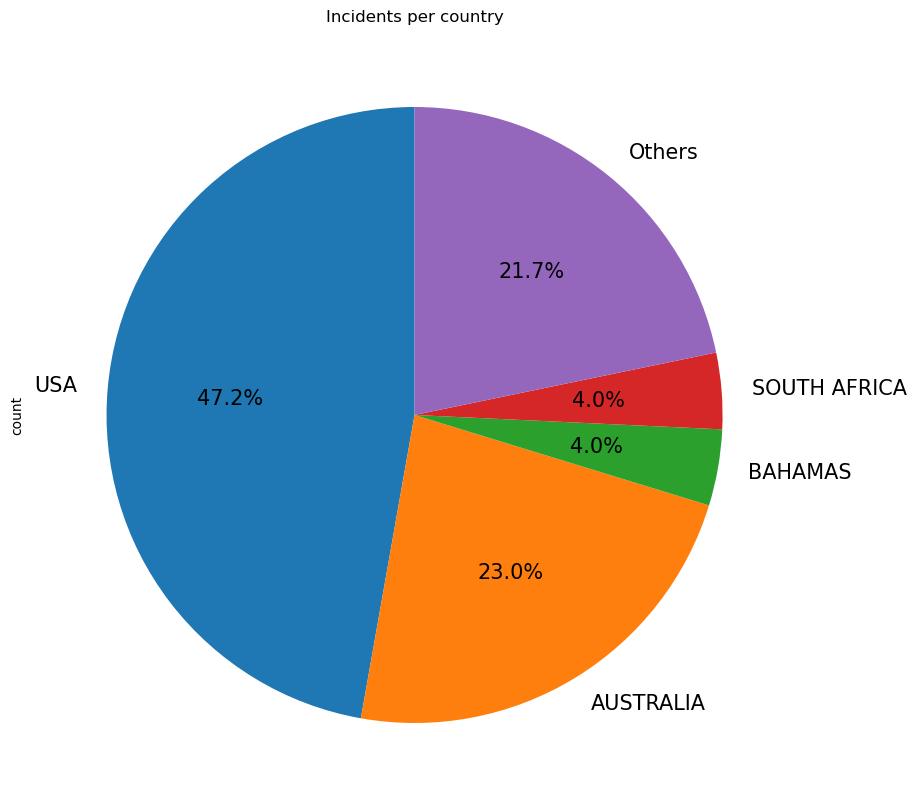

In [57]:
import matplotlib.pyplot as plt

def plot_top_countries_pie_chart(df):
    """
    Plots a pie chart of the top 4 countries with the most incidents and a fifth slice for the rest.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
    """
    # Get the top 4 countries
    top_4 = df.Country.value_counts()[0:4]
    # Sum the incidents for the remaining countries
    others = df.Country.value_counts()[4:].sum()
    # Add 'Others' to the top 4 countries
    top_4['Others'] = others
    
    # Plot the pie chart
    top_4.plot.pie(autopct='%1.1f%%', startangle=90, title='Incidents per country', figsize=(10, 10), fontsize=15)
    plt.show()

# Example usage:
# Assuming `df` is already defined
plot_top_countries_pie_chart(df)

Cell 20: Filter Incidents in USA


In [58]:
def filter_incidents_usa(df):
    df_usa = df[df['Country'] == 'USA'].copy()
    return df_usa

df_usa = filter_incidents_usa(df)
print(get_first_impression(df_usa))

           Date  Year Country            Location  \
1   04 Mar 2024  2024     USA  Old Man's, Waikiki   
2   02 Mar-2024  2024     USA      Rainbows, Oahu   
10  30 Dec-2023  2023     USA    Baby Beach, Maui   

                            Injury         Species  Activity  
1   No injury, shark bit surfboard  Tiger shark 8'   Surfing  
2         Lacerations to left foot  3' to 4' shark  Swimming  
10                           FATAL             NaN   Surfing  


Cell 22: Format Date Column


In [59]:


def format_date_column(df, date_column='Date'):
    """
    Formats the date column by removing unwanted characters, adding hyphens, converting to datetime, 
    and formatting to 'dd-mm-yy'.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the date column.
        date_column (str): The name of the date column to format. Default is 'Date'.
    
    Returns:
        pd.DataFrame: The dataframe with the formatted date column.
    """
    # Remove all whitespaces, commas, and hyphens from the date
    df[date_column] = df[date_column].apply(lambda x: re.sub(r'[-\s,]', '', str(x)))

    # Add a hyphen after the first four digits
    df[date_column] = df[date_column].apply(lambda x: re.sub(r'(\d{4})', r'\1-', str(x)))

    # Convert the month into a numerical value and format to 'dd-mm-yy'
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.strftime('%d-%m-%y')

    # Convert the 'Date' column back to datetime format
    df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%y', errors='coerce')
    
    # Reset the index of the dataframe
    df = df.reset_index(drop=True)
    
    return df

# Example usage:
# Assuming `df_usa` is already defined
df_usa = format_date_column(df_usa)
print(df_usa.head(3))


        Date  Year Country                                          Location  \
0 2024-03-04  2024     USA                                Old Man's, Waikiki   
1 2024-03-02  2024     USA                                    Rainbows, Oahu   
2 2023-12-30  2023     USA                                  Baby Beach, Maui   
3 2023-11-05  2023     USA                     Juno Beach, Palm Beach County   
4 2023-10-25  2023     USA                     Pua’ena Point,  Haleiwa, Oahu   
5 2023-10-15  2023     USA                                Hanalei Bay, Kauai   
6 2023-10-13  2023     USA  Linda Mar, Pacific State Beach, San Mateo County   
7 2023-10-02  2023     USA                                        Paia, Maui   
8 2023-10-01  2023     USA                       Wildcat Beach, Marin County   
9 2023-09-18  2023     USA                        Myrtle Beach, Horry County   

                              Injury                     Species  Activity  
0     No injury, shark bit surfboard      

Cell 23: Add Season Column


In [35]:
def add_season_column(df_usa):
    def get_season(Date):
        if pd.isna(Date):
            return 'Unknown'
        month = pd.to_datetime(Date).month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'
    
    df_usa['Season'] = df_usa['Date'].apply(get_season)
    return df_usa

df_usa = add_season_column(df_usa)
print(get_first_impression(df_usa))

         Date  Year Country            Location  \
1  2024-03-04  2024     USA  Old Man's, Waikiki   
2  2024-03-02  2024     USA      Rainbows, Oahu   
10 2023-12-30  2023     USA    Baby Beach, Maui   

                            Injury         Species  Activity  Season  
1   No injury, shark bit surfboard  Tiger shark 8'   Surfing  Spring  
2         Lacerations to left foot  3' to 4' shark  Swimming  Spring  
10                           FATAL             NaN   Surfing  Winter  


Cell 24: Group by Season and Year


In [36]:
def group_by_season_year(df_usa):
    grouped_season = df_usa.groupby(['Season', 'Year']).size().unstack(fill_value=0)
    grouped_season['Total sum'] = grouped_season.sum(axis=1)
    grouped_season = grouped_season.drop('Unknown')
    return grouped_season

grouped_season = group_by_season_year(df_usa)
print(grouped_season)

Year    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  Total sum
Season                                                                       
Fall      29    17    18    13    11    14     6    12    11     0        131
Spring    11    17    19     8    16     7    14     9    13     2        116
Summer    28    24    22    21    25    22    25    24    16     0        207
Winter     5     6     7     0     6     5     9     7     4     0         49


Cell 25: Plot Incidents by Season


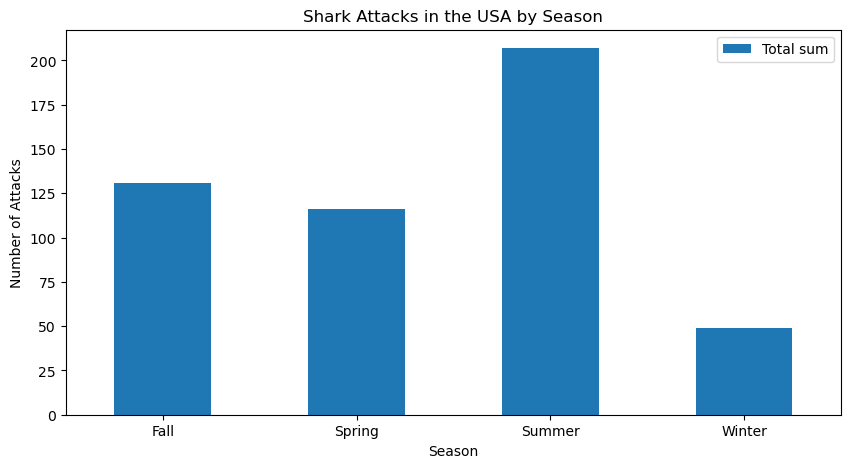

In [37]:
def plot_incidents_by_season(grouped_season):
    grouped_season[['Total sum']].plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title('Shark Attacks in the USA by Season')
    plt.ylabel('Number of Attacks')
    plt.xlabel('Season')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

plot_incidents_by_season(grouped_season)

Cell 26: Standardize Species Names


In [60]:
def standardize_species_names(df_usa):
    df_usa['Species'].fillna("Not Specified", inplace=True)
    species_replacements = {
        "white shark": "White Shark",
        "tiger shark": "Tiger Shark",
        "bull shark": "Bull Shark",
        "nurse shark": "Nurse Shark",
        "blacktip shark": "Blacktip Shark",
    }
    
    for key, value in species_replacements.items():
        df_usa['Species'] = df_usa['Species'].apply(lambda x: value if key in str(x).lower() else x)
    
    common_species = df_usa['Species'].value_counts().head(7).index
    df_usa['Species'] = df_usa['Species'].apply(lambda x: x if str(x) in common_species else "Others")
    
    return df_usa

df_usa = standardize_species_names(df_usa)

Cell 27: Plot Shark Attacks by Species


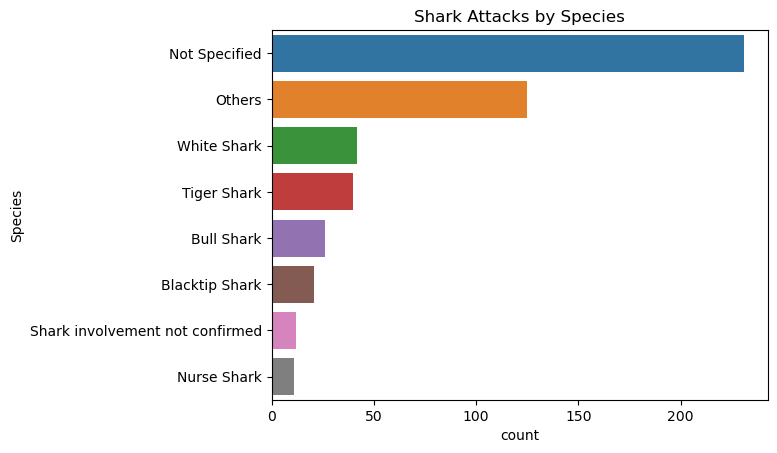

In [39]:
def plot_shark_attacks_by_species(df_usa):
    fig = sns.countplot(y="Species", data=df_usa, order=df_usa["Species"].value_counts().index)
    fig.set_title('Shark Attacks by Species')
    plt.show()

plot_shark_attacks_by_species(df_usa)

Cell 28: Final Data Check


In [40]:
def final_data_check(df_usa):
    print(df_usa.head())
    print(df_usa['Species'].value_counts().head(10))
    print(df_usa['Species'].isnull().sum())
    print(df_usa['Species'].value_counts())

final_data_check(df_usa)

         Date  Year Country                       Location  \
1  2024-03-04  2024     USA             Old Man's, Waikiki   
2  2024-03-02  2024     USA                 Rainbows, Oahu   
10 2023-12-30  2023     USA               Baby Beach, Maui   
24 2023-11-05  2023     USA  Juno Beach, Palm Beach County   
29 2023-10-25  2023     USA  Pua’ena Point,  Haleiwa, Oahu   

                            Injury        Species  Activity  Season  
1   No injury, shark bit surfboard    Tiger Shark   Surfing  Spring  
2         Lacerations to left foot         Others  Swimming  Spring  
10                           FATAL  Not Specified   Surfing  Winter  
24    Lacerations to right forearm  Not Specified  Swimming    Fall  
29             Bite to right thigh    Tiger Shark   Surfing    Fall  
Species
Not Specified                      231
Others                             125
White Shark                         42
Tiger Shark                         40
Bull Shark                          26
Blac

# Conclusion
In this project, we performed data cleaning, exploration, and visualization to understand shark attack incidents. We identified the most common species involved, analyzed the data by year and location, and created visualizations to represent the findings.